<a href="https://colab.research.google.com/github/NitinShindeJ/TensorFlow2.0/blob/master/My_learn_TF2.0/TF2_0_NLP_CNN_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.0.0-beta1  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0.0-beta1  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.2.0-rc3


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Dense, GlobalMaxPooling1D, Input, Embedding, Conv1D, MaxPooling1D 
from tensorflow.keras.models import Model

In [4]:
# Unfortunately this URL doesn't work directly with pd.read_csv
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2020-04-25 12:45:23--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 104.31.80.48, 2606:4700:3035::681f:5130, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.01s   

2020-04-25 12:45:23 (33.2 MB/s) - ‘spam.csv’ saved [503663/503663]



In [0]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [0]:
df.head()

In [0]:
# rename columns to something better
df.columns = ['labels', 'data']

In [0]:
df.head()

In [9]:
df.labels.value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

In [0]:
#Created Binary Labels
df['B_Labels'] = df['labels'].map({'ham':0, 'spam':1})
Y = df['B_Labels'].values

In [11]:
#if we use . values the it converts the df to array
Y = df['B_Labels']#.values
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: B_Labels, Length: 5572, dtype: int64

In [0]:
#Split the data
df_train, df_test, Y_train, Y_test = train_test_split(df['data'], Y, test_size=0.33)

In [0]:
# Convert sentences to sequences
Max_Vocab_size = 20000
tokenizer = Tokenizer(num_words=Max_Vocab_size)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [29]:
#Get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s Unique Tokesn.' %V)

Found 7124 Unique Tokesn.


In [30]:
# pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

Shape of data train tensor: (3733, 189)


In [31]:
# get sequence length
T = data_train.shape[1]

data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 189)


In [0]:
#Create the model

#We get to choosed embedding Dimensioality
#Hyper parameter so it is based on exp
D = 20

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

i = Input(shape=(T,))
x = Embedding(V+1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3 , activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense (1, activation='sigmoid')(x)

model = Model (i, x)

In [0]:
#Compile & Fit
model.compile(
    loss = 'binary_crossentropy',
    optimizer= 'adam',
    metrics = ['accuracy']
)

In [34]:
print('Training model...')
r = model.fit(
  data_train,
  Y_train,
  epochs=5,
  validation_data=(data_test, Y_test)
)

Training model...
Epoch 1/5
117/117 [==============================] - 2s 19ms/step - loss: 0.3742 - accuracy: 0.8695 - val_loss: 0.2790 - val_accuracy: 0.8537
Epoch 2/5
117/117 [==============================] - 2s 18ms/step - loss: 0.1070 - accuracy: 0.9550 - val_loss: 0.0673 - val_accuracy: 0.9810
Epoch 3/5
117/117 [==============================] - 2s 18ms/step - loss: 0.0215 - accuracy: 0.9938 - val_loss: 0.0629 - val_accuracy: 0.9831
Epoch 4/5
117/117 [==============================] - 2s 18ms/step - loss: 0.0069 - accuracy: 0.9984 - val_loss: 0.0695 - val_accuracy: 0.9842
Epoch 5/5
117/117 [==============================] - 2s 18ms/step - loss: 0.0031 - accuracy: 0.9995 - val_loss: 0.0670 - val_accuracy: 0.9837


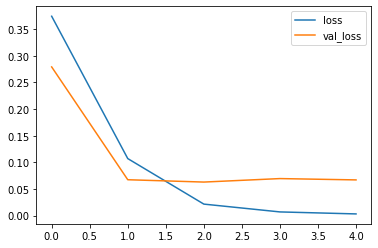

In [35]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

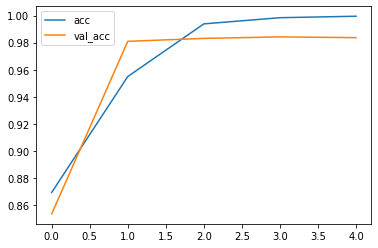

In [36]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()